# Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
# from statsFuncs import mean_confidence_interval
# from statsFuncs import compDistributions
import scipy
import random
import math 
from scipy import stats
mpl.rcParams['axes.linewidth'] = 2

import numpy as np
from scipy.integrate import cumtrapz
from scipy.stats import norm
from matplotlib import pyplot as plt
from statsFuncs import compDistributions



# Paths 

In [2]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
# datapath = figures_path + '/data/radiologists/Analysis5_22_2020/'
datapath = figures_path + '/data/radiologists/Peter/data_radio/'

# Plot params 

In [3]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Pull across category

In [41]:
def category_definition(morph):
    
    if (morph in range(124, 148)) or (morph in range(1, 26)):
        category = 'A'
    elif morph in range(26, 75):
        category = 'B'
    elif morph in range(75, 124):
        category = 'C'
        
    return category

In [328]:
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)


In [43]:
subjectdata.head()

,stimulusID,morphID,RT,trialNumber,blockNumber,stimLocationDeg,shifted_stimulusID,shifted_stimLocationDeg,shifted_morphID,Error,responseError,Stim_diff,Stim_Loc_diff,bootstrap_values,Running_Mean,slopes,intercepts,DoVM,same_category
0,67.0,72.0,2.899034,1.0,1.0,199.0,58.0,0.0,70.0,12.0,15.591656,9.0,-161.0,2.601034,0.172058,0.193816,0.097387,-5.299618e-17,True
1,58.0,70.0,2.149815,2.0,1.0,0.0,57.0,331.0,76.0,19.0,19.001205,1.0,29.0,1.652953,0.127298,0.173817,-0.234304,-1.863737e-02,True
2,133.0,78.0,4.315844,4.0,1.0,235.0,135.0,277.0,143.0,8.0,7.999045,-2.0,-42.0,2.142701,-0.017763,0.182917,-0.651661,-3.735816e-02,True
3,135.0,143.0,3.183391,5.0,1.0,277.0,127.0,29.0,144.0,17.0,17.000000,8.0,-112.0,2.411862,-0.109145,0.224286,0.402723,-5.624599e-02,True
4,127.0,144.0,1.099883,6.0,1.0,29.0,25.0,171.0,26.0,1.0,1.000000,-44.0,-142.0,1.778877,-0.252766,0.110848,-0.099127,-7.538492e-02,True


In [329]:
diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)


In [171]:
diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(diff_category['responseError'])
x = np.asarray(diff_category['Stim_diff'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')
            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            else:
                color.append('gray')


            
diff_category.loc[:, 'eff'] = color
len(color) == len(y)  
            

True

In [172]:
diff_category

,stimulusID,morphID,RT,trialNumber,blockNumber,stimLocationDeg,shifted_stimulusID,shifted_stimLocationDeg,shifted_morphID,Error,responseError,Stim_diff,Stim_Loc_diff,bootstrap_values,Running_Mean,slopes,intercepts,DoVM,same_category,eff
0,25.0,26.0,4.300511,7.0,1.0,171.0,101.0,160.0,104.0,3.0,2.000979,70.0,11.0,NaN,-0.352360,NaN,NaN,-0.094860,False,gray
1,101.0,104.0,11.382901,8.0,1.0,160.0,131.0,301.0,140.0,9.0,9.000000,-30.0,-141.0,NaN,-0.448567,NaN,NaN,-0.114756,False,gray
2,5.0,5.0,3.316789,10.0,1.0,67.0,122.0,82.0,12.0,36.0,36.000000,29.0,-15.0,NaN,-0.585864,NaN,NaN,-0.156158,False,magenta
3,108.0,112.0,3.232712,12.0,1.0,89.0,126.0,350.0,111.0,-15.0,-15.000000,-18.0,99.0,NaN,-0.770244,NaN,NaN,-0.200297,False,gray
4,126.0,111.0,3.763752,13.0,1.0,350.0,30.0,187.0,32.0,2.0,2.000000,-50.0,163.0,NaN,-0.635140,NaN,NaN,-0.223618,False,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,47.0,55.0,2.315794,77.0,3.0,15.0,8.0,296.0,7.0,-1.0,-1.000000,39.0,79.0,NaN,NaN,NaN,NaN,NaN,False,gray
2135,8.0,7.0,1.885999,78.0,3.0,296.0,36.0,130.0,31.0,-5.0,-5.000000,-28.0,166.0,NaN,NaN,NaN,NaN,NaN,False,gray
2136,37.0,44.0,1.299518,81.0,3.0,132.0,122.0,250.0,117.0,-5.0,-5.000000,61.0,-118.0,NaN,NaN,NaN,NaN,NaN,False,gray
2137,76.0,81.0,3.432437,83.0,3.0,205.0,147.0,140.0,7.0,6.0,6.000000,-71.0,65.0,NaN,NaN,NaN,NaN,NaN,False,gray


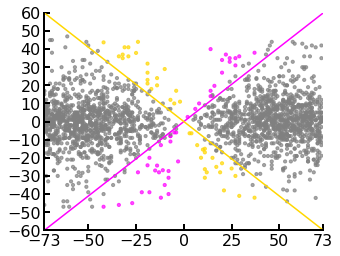

In [173]:
# plt.figure(figsize=(5, 4))
f, ax = plt.subplots(figsize=(5, 4))

ax.scatter(diff_category['Stim_diff'], diff_category['responseError'], c=diff_category['eff'], alpha = 0.7, marker='o', s=10)
plt.xlim([-73, 73])
plt.ylim([-60, 60])
plt.yticks(np.arange(-60, 70, 10))
# plt.xticks(np.arange(-70, 80, 20))
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='magenta')
ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='gold')

# plt.plot([0, 1], [0, 1])
# plt.show()#, transform=ax.transAxes)


Text(0.5, 0, '\nRelative Orientation of previous trial\n(morph units)')

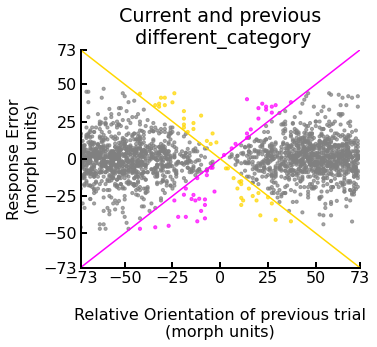

In [174]:
# plt.figure(figsize=(5, 4))
f, ax = plt.subplots(figsize=(5, 4))

ax.scatter(diff_category['Stim_diff'], diff_category['responseError'], c=diff_category['eff'], alpha = 0.7, marker='o', s=10)
plt.xlim([-73, 73])
plt.ylim([-73, 73])
# plt.yticks(np.arange(-73, 83, 10))
# plt.xticks(np.arange(-70, 80, 20))
plt.yticks([-73, -50, -25, 0, 25, 50, 73])
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='magenta')
ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='gold')
plt.title('Current and previous\n ' + 'different_category')
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
# plt.plot([0, 1], [0, 1])
# plt.show()#, transform=ax.transAxes)


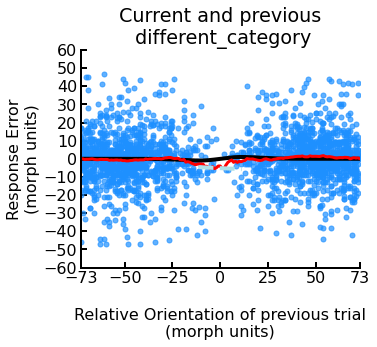

In [109]:
## Von Mise fitting: Shape Similarity##
init_vals = [-25, 4]
best_vals, covar = curve_fit(vonmise_derivative, diff_category['Stim_diff'], diff_category['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
#### RUNNING MEAN ####
RM, xvals = getRunningMean(diff_category['Stim_diff'], diff_category['responseError'], step = 20)

plt.figure(figsize=(5, 4))
plt.plot(diff_category['Stim_diff'], diff_category['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
x = np.linspace(-75, 75, 300)
y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in diff_category['Stim_diff']]
plt.plot(x, y, '-', linewidth = 4, color='k')
plt.plot(xvals, RM, label = 'Running Mean', color = 'red', linewidth = 3)
peak_x = (x[np.argmax(y)])
poly1d_fn, coef = getRegressionLine(x = diff_category['Stim_diff'], y= diff_category['responseError'], peak = peak_x)
xdiff_category = np.linspace(-peak_x, peak_x, 100)
plt.plot(xdiff_category, poly1d_fn(xdiff_category), linestyle='--', color='powderblue', linewidth = 4)
plt.xlim([-73, 73])
plt.ylim([-60, 60])
plt.yticks(np.arange(-60, 70, 10))
# plt.xticks(np.arange(-70, 80, 20))
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
# print(coef[0], coef[1])
plt.title('Current and previous\n ' + 'different_category')
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')

plt.show()

In [175]:
total_dots = len(y)
pink_dots = len(diff_category[diff_category['eff'] == 'magenta'])
yellow_dots = len(diff_category[diff_category['eff'] == 'gold'])
print('Number of total points:', total_dots)
print('Number of pink points:', pink_dots)
print('Number of yellow points:', yellow_dots)

Number of total points: 2139
Number of pink points: 40
Number of yellow points: 40


In [126]:
np.sum((diff_category['Stim_diff'] >= -25) & (diff_category['Stim_diff'] <= 25))

275

Number of total points: 275
Number of pink points: 33
Number of yellow points: 30


/Users/teresa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/teresa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


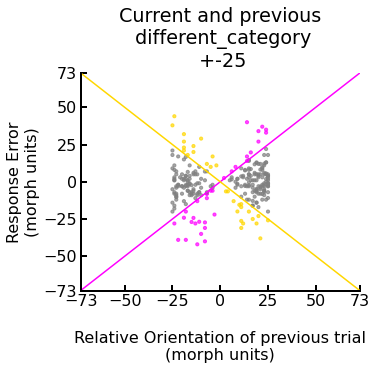

In [129]:
plusminus25 = diff_category[(diff_category['Stim_diff'] >= -25) & (diff_category['Stim_diff'] <= 25)]
y = np.asarray(plusminus25['responseError'])
x = np.asarray(plusminus25['Stim_diff'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')
            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            else:
                color.append('gray')

plusminus25.loc[:, 'eff'] = color
len(color) == len(y)  
            
# plt.figure(figsize=(5, 4))
f, ax = plt.subplots(figsize=(5, 4))

ax.scatter(plusminus25['Stim_diff'], plusminus25['responseError'], c=plusminus25['eff'], alpha = 0.7, marker='o', s=10)
plt.xlim([-73, 73])
plt.ylim([-73, 73])
# plt.yticks(np.arange(-73, 83, 10))
# plt.xticks(np.arange(-70, 80, 20))
plt.yticks([-73, -50, -25, 0, 25, 50, 73])
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='magenta')
ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='gold')
plt.title('Current and previous\n ' + 'different_category\n +-25')
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')


    
total_dots = len(y)
pink_dots = len(plusminus25[plusminus25['eff'] == 'magenta'])
yellow_dots = len(plusminus25[plusminus25['eff'] == 'gold'])
print('Number of total points:', total_dots)
print('Number of pink points:', pink_dots)
print('Number of yellow points:', yellow_dots)
            

In [133]:
plusminus25[['Stim_diff', 'responseError']].to_csv('plusminus25_data.csv', index=False)

In [131]:
len(plusminus25)

275

In [132]:
plusminus25.head()

,stimulusID,morphID,RT,trialNumber,blockNumber,stimLocationDeg,shifted_stimulusID,shifted_stimLocationDeg,shifted_morphID,Error,responseError,Stim_diff,Stim_Loc_diff,bootstrap_values,Running_Mean,slopes,intercepts,DoVM,same_category,eff
3,108.0,112.0,3.232712,12.0,1.0,89.0,126.0,350.0,111.0,-15.0,-15.000000,-18.0,99.0,NaN,-0.770244,NaN,NaN,-0.200297,False,gray
16,23.0,25.0,4.416986,33.0,1.0,66.0,33.0,227.0,35.0,2.0,2.000236,-10.0,-161.0,NaN,-0.942053,NaN,NaN,-1.006023,False,gray
20,71.0,76.0,6.533402,38.0,1.0,304.0,76.0,339.0,73.0,-3.0,-3.000000,-5.0,-35.0,NaN,-1.183585,NaN,NaN,-1.318667,False,gray
24,143.0,143.0,6.167502,43.0,1.0,2.0,123.0,67.0,4.0,27.0,27.000000,20.0,-65.0,NaN,-1.129300,NaN,NaN,-1.651500,False,magenta
40,121.0,85.0,2.799547,67.0,1.0,267.0,129.0,255.0,95.0,-34.0,-27.287864,-8.0,12.0,NaN,-1.110649,NaN,NaN,-1.465679,False,magenta


# Distance to category boundary 

## Empirical 

In [517]:
def category_definition(morph):
    
    if (morph in range(124, 148)) or (morph in range(1, 26)):
        category = 'A'
    elif morph in range(26, 75):
        category = 'B'
    elif morph in range(75, 124):
        category = 'C'
        
    return category

def boundary_definition(current_category, prev_category):
    
    if (current_category == 'B' and prev_category == 'A') or (current_category == 'A' and prev_category == 'B'):
        boundary = 26
    elif (current_category == 'C'and prev_category == 'B') or (current_category == 'B'and prev_category == 'C'):
        boundary = 75
        
    elif (current_category == 'A' and prev_category == 'C') or (current_category == 'C'and prev_category == 'A'):
        boundary = 124
        
    return boundary

def dist_boundary(current, prev):
    
    current_category = category_definition(current)
    prev_category = category_definition(prev)
    
    boundary = boundary_definition(current_category, prev_category)
    
    if (current_category == 'A' and prev_category == 'C'):
#         print('here')
        if current < 124:
            current += 147
            
    elif (current_category == 'A' and prev_category == 'B'):
        if current > 26:
            current -= 147
#         current = 
#     print(current)
    distance = current - boundary
#     print('Distance to boundary:', distance)
    
    return distance, boundary
    

In [518]:
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)
diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)


In [519]:
for row in range(len(diff_category)):
    distance, boundary = dist_boundary(diff_category.loc[row, 'shifted_stimulusID'], diff_category.loc[row, 'stimulusID'])
    
    diff_category.loc[row, 'distance'] = distance
    diff_category.loc[row, 'boundary'] = boundary


In [377]:
diff_category.head()

,stimulusID,morphID,RT,trialNumber,blockNumber,stimLocationDeg,shifted_stimulusID,shifted_stimLocationDeg,shifted_morphID,Error,...,Stim_diff,Stim_Loc_diff,bootstrap_values,Running_Mean,slopes,intercepts,DoVM,same_category,distance,boundary
0,25.0,26.0,4.300511,7.0,1.0,171.0,101.0,160.0,104.0,3.0,...,70.0,11.0,NaN,-0.352360,NaN,NaN,-0.094860,False,48.0,124.0
1,101.0,104.0,11.382901,8.0,1.0,160.0,131.0,301.0,140.0,9.0,...,-30.0,-141.0,NaN,-0.448567,NaN,NaN,-0.114756,False,-23.0,124.0
2,5.0,5.0,3.316789,10.0,1.0,67.0,122.0,82.0,12.0,36.0,...,29.0,-15.0,NaN,-0.585864,NaN,NaN,-0.156158,False,28.0,124.0
3,108.0,112.0,3.232712,12.0,1.0,89.0,126.0,350.0,111.0,-15.0,...,-18.0,99.0,NaN,-0.770244,NaN,NaN,-0.200297,False,-16.0,124.0
4,126.0,111.0,3.763752,13.0,1.0,350.0,30.0,187.0,32.0,2.0,...,-50.0,163.0,NaN,-0.635140,NaN,NaN,-0.223618,False,-47.0,26.0


In [378]:
# subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)


In [520]:
# diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(diff_category['responseError'])
x = np.asarray(diff_category['Stim_diff'])
z = np.asarray(diff_category['distance'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            elif np.abs(y[idx]) > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')

            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            elif y[idx] > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')


            
diff_category.loc[:, 'eff_extended'] = color
len(color) == len(y)  
            

True

Text(0.5, 0, '\nRelative Orientation of previous trial\n(morph units)')

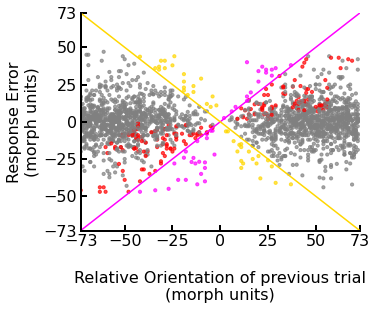

In [521]:
# plt.figure(figsize=(5, 4))
f, ax = plt.subplots(figsize=(5, 4))

ax.scatter(diff_category['Stim_diff'], diff_category['responseError'], c=diff_category['eff_extended'], alpha = 0.7, marker='o', s=10)
plt.xlim([-73, 73])
plt.ylim([-73, 73])

plt.yticks([-73, -50, -25, 0, 25, 50, 73])
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='magenta')
ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='gold')
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
# plt.plot([0, 1], [0, 1])
# plt.show()#, transform=ax.transAxes)


In [381]:
def clockwise_definition(curr, prev):
    if (curr == 'A' and prev == 'B') or (curr == 'B' and prev == 'C') or (curr == 'C' and prev == 'A'):
        c = 'clockwise'
    elif (curr == 'B' and prev == 'A') or (curr == 'A' and prev == 'C') or (curr == 'C' and prev == 'B'):
        c = 'counterclockwise'
    return c

In [382]:
dw = diff_category.loc[diff_category['eff_extended'] == 'red', ['stimulusID', 'shifted_stimulusID', 'Stim_diff', 'responseError', 'distance', 'boundary', 'eff_extended']].reset_index(drop=True)
dw['responseError'] = dw['responseError'].round(4)
dw['category_current'] = dw['stimulusID'].apply(category_definition)
dw['category_previous'] = dw['shifted_stimulusID'].apply(category_definition)
for row in range(len(dw)):
    dw.loc[row, 'direction']= clockwise_definition(dw.loc[row, 'category_current'], dw.loc[row, 'category_previous'])
dw.rename(columns={'stimulusID': 'current', 'shifted_stimulusID': 'prev'}, inplace=True)

In [383]:
dw.head()

,current,prev,Stim_diff,responseError,distance,boundary,eff_extended,category_current,category_previous,direction
0,76.0,42.0,34.0,25.0000,1.0,75.0,red,C,B,counterclockwise
1,122.0,6.0,-30.0,-6.0000,-2.0,124.0,red,C,A,clockwise
2,75.0,49.0,26.0,7.9992,0.0,75.0,red,C,B,counterclockwise
3,83.0,43.0,40.0,9.0000,8.0,75.0,red,C,B,counterclockwise
4,82.0,40.0,42.0,31.0000,7.0,75.0,red,C,B,counterclockwise


In [522]:
total_dots = len(diff_category)
pink_dots = len(diff_category[(diff_category['eff_extended'] == 'magenta') | (diff_category['eff_extended'] == 'red')])
yellow_dots = len(diff_category[diff_category['eff_extended'] == 'gold'])
pink_dots_perc = pink_dots/total_dots

print('Number of total points:', total_dots)
print('Number of pink points:', pink_dots)
print('Number of yellow points:', yellow_dots)

Number of total points: 2139
Number of pink points: 202
Number of yellow points: 40


In [523]:
pink_dots_perc

0.09443665264142123

### Plusminus 25 

In [524]:
plusminus25 = diff_category[(diff_category['Stim_diff'] >= -25) & (diff_category['Stim_diff'] <= 25)].reset_index(drop=True)

In [525]:
for row in range(len(plusminus25)):
    distance, boundary = dist_boundary( plusminus25.loc[row, 'shifted_stimulusID'], plusminus25.loc[row, 'stimulusID'])
    
    plusminus25.loc[row, 'distance'] = distance
    plusminus25.loc[row, 'boundary'] = boundary

    
# plusminus25 = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(plusminus25['responseError'])
x = np.asarray(plusminus25['Stim_diff'])
z = np.asarray(plusminus25['distance'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            elif np.abs(y[idx]) > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')

            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            elif y[idx] > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')


            
plusminus25.loc[:, 'eff_extended'] = color
total_dots_plusminus25 = len(plusminus25)
pink_dots_plusminus25 = len(plusminus25[(plusminus25['eff_extended'] == 'magenta') | (plusminus25['eff_extended'] == 'red')])
yellow_dots_plusminus25 = len(plusminus25[plusminus25['eff_extended'] == 'gold'])
pink_dots_plusminus25_perc = pink_dots_plusminus25/total_dots_plusminus25

In [526]:
print('Number of total points:', total_dots_plusminus25)
print('Number of pink points:', pink_dots_plusminus25)
print('Number of yellow points:', yellow_dots_plusminus25)
print('Percentage of pink points:', pink_dots_plusminus25_perc)

Number of total points: 275
Number of pink points: 79
Number of yellow points: 30
Percentage of pink points: 0.2872727272727273


### Plusminus 15 

In [527]:
plusminus15 = diff_category[(diff_category['Stim_diff'] >= -15) & (diff_category['Stim_diff'] <= 15)].reset_index(drop=True)

In [528]:
for row in range(len(plusminus15)):
    distance, boundary = dist_boundary(plusminus15.loc[row, 'shifted_stimulusID'], plusminus15.loc[row, 'stimulusID'])
    
    plusminus15.loc[row, 'distance'] = distance
    plusminus15.loc[row, 'boundary'] = boundary

    
# plusminus15 = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(plusminus15['responseError'])
x = np.asarray(plusminus15['Stim_diff'])
z = np.asarray(plusminus15['distance'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            elif np.abs(y[idx]) > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')

            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            elif y[idx] > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')


            
plusminus15.loc[:, 'eff_extended'] = color
total_dots_plusminus15 = len(plusminus15)
pink_dots_plusminus15 = len(plusminus15[(plusminus15['eff_extended'] == 'magenta') | (plusminus15['eff_extended'] == 'red')])
yellow_dots_plusminus15 = len(plusminus15[plusminus15['eff_extended'] == 'gold'])
pink_dots_plusminus15_perc = pink_dots_plusminus15/total_dots_plusminus15

## Null 

In [531]:
def init_null_pink(data, is_plus_minus, how_much=25, nIterations=5000):
    data_null = pd.DataFrame(columns=['ITERATION', 'SUBJECT', 'TYPE', 'AMPLITUDE', 'SLOPE'])
    row = 0
    data['Stim_diff_og'] = data['Stim_diff']
    init_vals = [-25, 1.5]
    pink_dots = []
    pink_perc = []
    for iteration in range(nIterations):
        print(iteration)
        
        data['Stim_diff'] = data['Stim_diff_og'].sample(frac=1).reset_index(drop=True)

        data['same_category'] = data['stimulusID'].apply(category_definition) == data['shifted_stimulusID'].apply(category_definition)

        diff_category = data[data['same_category'] == False].reset_index(drop=True)
        
        for row in range(len(diff_category)):
            distance, boundary = dist_boundary(diff_category.loc[row, 'shifted_stimulusID'], diff_category.loc[row, 'stimulusID'])

            diff_category.loc[row, 'distance'] = distance
            diff_category.loc[row, 'boundary'] = boundary
        
        if is_plus_minus:
            diff_category = diff_category[(diff_category['Stim_diff'] >= -how_much) & (diff_category['Stim_diff'] <= how_much)]

        y = np.asarray(diff_category['responseError'])
        x = np.asarray(diff_category['Stim_diff'])
        z = np.asarray(diff_category['distance'])
        color=[]
        for idx in range(len(y)):
            if x[idx] < 0: # x[idx] is negative, left part of panel
                if y[idx] < 0: # y[idx] is negative, left bottom part of graph
                    if y[idx] < x[idx]:
                        color.append('magenta')
                    elif np.abs(y[idx]) > np.abs(z[idx]):
                        color.append('red')
                    else:
                        color.append('gray')
                else:
                    if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                        color.append('gold')

                    else:
                        color.append('gray')

            else: # x[idx] is positive, right part of panel
                if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
                    if y[idx] < -x[idx]:
                        color.append('gold')
                    else:
                        color.append('gray')
                else: # y[idx] is positive, right top part of the graph
                    if y[idx] > x[idx]:
                        color.append('magenta')
                    elif y[idx] > np.abs(z[idx]):
                        color.append('red')
                    else:
                        color.append('gray')



        diff_category.loc[:, 'eff_extended'] = color
        total_dots = len(diff_category)
        pink_dots_iteration = len(diff_category[(diff_category['eff_extended'] == 'magenta') | (diff_category['eff_extended'] == 'red')])
#         yellow_dots = len(diff_category[diff_category['eff_extended'] == 'gold'])
        pink_dots.append(pink_dots_iteration)
        pink_perc.append(pink_dots_iteration/total_dots)
    return pink_dots, pink_perc



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, 'All dots')

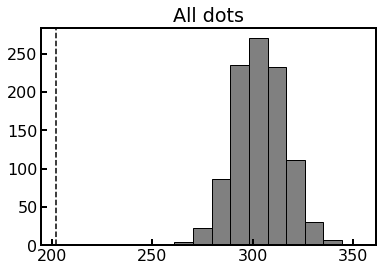

In [532]:
pink_dots_null, pink_dots_null_perc = init_null_pink(subjectdata, is_plus_minus=False, nIterations=1000)
plt.hist(pink_dots_null, color='gray', edgecolor='black')
plt.axvline(pink_dots, color='black', linestyle='--')
plt.title('All dots')

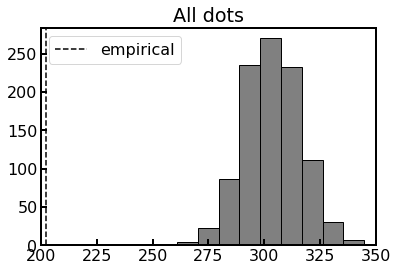

In [533]:
plt.hist(pink_dots_null, color='gray', edgecolor='black')
plt.axvline(pink_dots, color='black', linestyle='--', label='empirical')
plt.xlim([200, 350])
plt.legend()
plt.title('All dots');


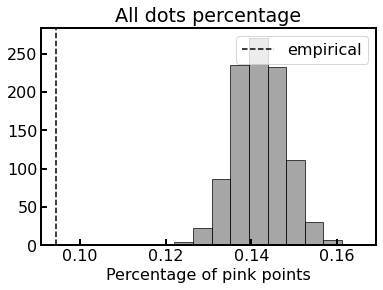

In [576]:
plt.hist(pink_dots_null_perc, color='gray', edgecolor='black', alpha=0.7)
plt.axvline(pink_dots_perc, color='black', linestyle='--', label='empirical')
# plt.xlim([0.1, 0.16])
plt.xlabel('Percentage of pink points')
plt.legend()
plt.title('All dots percentage');


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, '+-25')

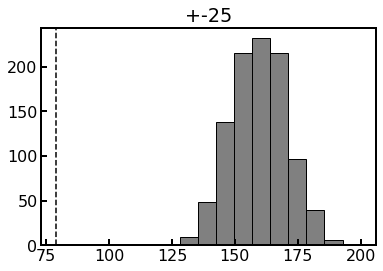

In [577]:
pink_dots_null_plusminus25, pink_dots_null_plusminus25_perc = init_null_pink(subjectdata, is_plus_minus=True, nIterations=1000)
plt.hist(pink_dots_null_plusminus25, color='gray', edgecolor='black')
plt.axvline(pink_dots_plusminus25, color='black', linestyle='--')
plt.title('+-25')

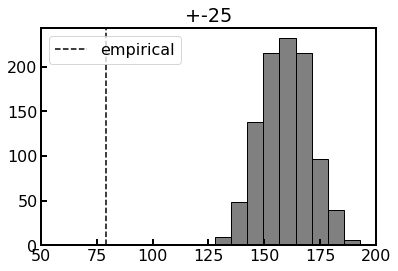

In [578]:
plt.hist(pink_dots_null_plusminus25, color='gray', edgecolor='black')
plt.axvline(pink_dots_plusminus25, color='black', linestyle='--', label='empirical')
plt.xlim([50, 200])
plt.legend()
plt.title('+-25');

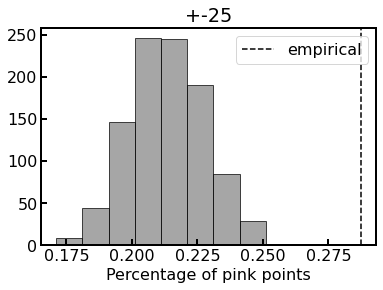

In [580]:
plt.hist(pink_dots_null_plusminus25_perc, color='gray', edgecolor='black', alpha=0.7)
plt.axvline(pink_dots_plusminus25_perc, color='black', linestyle='--', label='empirical')
# plt.xlim([0.16, 0.28])
plt.xlabel('Percentage of pink points')
plt.legend()
plt.title('+-25');

In [581]:
np.mean(pink_dots_null_plusminus25_perc)

0.21354993349166448

In [582]:
np.median(pink_dots_null_plusminus25_perc)

0.21341455577080215

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0.5, 1.0, '+-15')

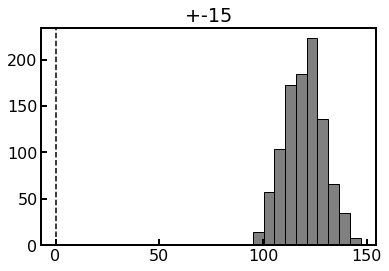

In [583]:
pink_dots_null_plusminus15, pink_dots_null_plusminus15_perc = init_null_pink(subjectdata, is_plus_minus=True, how_much=15,nIterations=1000)
plt.hist(pink_dots_null_plusminus15, color='gray', edgecolor='black')
plt.axvline(pink_dots_plusminus15_perc, color='black', linestyle='--')
plt.title('+-15')

Text(0.5, 1.0, '+-15')

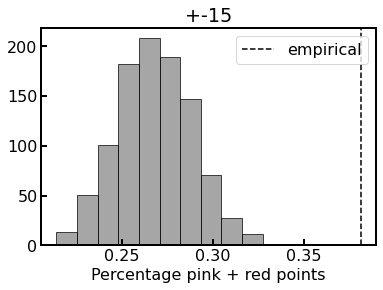

In [584]:
plt.hist(pink_dots_null_plusminus15_perc, color='gray', edgecolor='black', alpha=0.7)
plt.axvline(pink_dots_plusminus15_perc, color='black', linestyle='--', label='empirical')
plt.xlabel('Percentage pink + red points')
plt.legend()
plt.title('+-15')

## Nforward

In [304]:
futurepath = figures_path + '/data/radiologists/trials_forward/good_rbf/'

In [311]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']
future_supersubject = pd.DataFrame()
for subject in subject_names:
    tmp = pd.read_csv(futurepath + subject + '/' + subject + '_VM_output_1nBack.csv')
    tmp = tmp[(tmp['trialNumber'] >=1) & (tmp['trialNumber'] <=84)]
#     tmp['subject'] = subject
    future_supersubject = pd.concat([future_supersubject, tmp], axis=0)

In [316]:
len(future_supersubject)

3201

In [319]:
future_supersubject['same_category'] = future_supersubject['stimulusID'].apply(category_definition) == future_supersubject['shifted_stimulusID'].apply(category_definition)
diff_category_supersubject = future_supersubject[future_supersubject['same_category'] == False].reset_index(drop=True)


In [320]:
for row in range(len(diff_category_supersubject)):
    distance, boundary = dist_boundary(diff_category_supersubject.loc[row, 'stimulusID'], diff_category_supersubject.loc[row, 'shifted_stimulusID'])
    
    diff_category_supersubject.loc[row, 'distance'] = distance
    diff_category_supersubject.loc[row, 'boundary'] = boundary


In [321]:
# diff_category_supersubject = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(diff_category_supersubject['responseError'])
x = np.asarray(diff_category_supersubject['Stim_diff'])
z = np.asarray(diff_category_supersubject['distance'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            elif np.abs(y[idx]) > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')

            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            elif y[idx] > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')


            
diff_category_supersubject.loc[:, 'eff_extended'] = color
len(color) == len(y)  
            

True

Text(0.5, 1.0, 'N-forward trials')

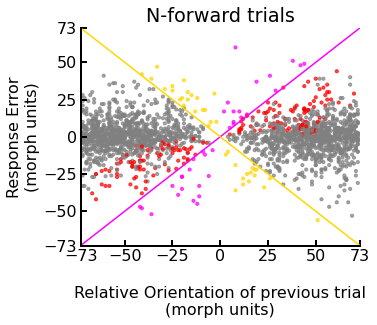

In [325]:
# plt.figure(figsize=(5, 4))
f, ax = plt.subplots(figsize=(5, 4))

ax.scatter(diff_category_supersubject['Stim_diff'], diff_category_supersubject['responseError'], c=diff_category_supersubject['eff_extended'], alpha = 0.7, marker='o', s=10)
plt.xlim([-73, 73])
plt.ylim([-73, 73])

plt.yticks([-73, -50, -25, 0, 25, 50, 73])
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='magenta')
ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='gold')
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
plt.title('N-forward trials')
# plt.plot([0, 1], [0, 1])
# plt.show()#, transform=ax.transAxes)


In [323]:
total_dots = len(diff_category_supersubject)
pink_dots = len(diff_category_supersubject[(diff_category_supersubject['eff_extended'] == 'magenta') | (diff_category_supersubject['eff_extended'] == 'red')])
yellow_dots = len(diff_category_supersubject[diff_category_supersubject['eff_extended'] == 'gold'])
print('Number of total points:', total_dots)
print('Number of pink points:', pink_dots)
print('Number of yellow points:', yellow_dots)

Number of total points: 2147
Number of pink points: 208
Number of yellow points: 37


### Plusminus25 

In [408]:
plusminus25_future = diff_category_supersubject[(diff_category_supersubject['Stim_diff'] >= -25) & (diff_category_supersubject['Stim_diff'] <= 25)].reset_index(drop=True)
# diff_category_supersubject = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
y = np.asarray(plusminus25_future['responseError'])
x = np.asarray(plusminus25_future['Stim_diff'])
z = np.asarray(plusminus25_future['distance'])
color=[]
for idx in range(len(y)):
    if x[idx] < 0: # x[idx] is negative, left part of panel
        if y[idx] < 0: # y[idx] is negative, left bottom part of graph
            if y[idx] < x[idx]:
                color.append('magenta')
            elif np.abs(y[idx]) > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')
        else:
            if y[idx] > abs(x[idx]): # y[idx] is positive, left top part of the graph
                color.append('gold')

            else:
                color.append('gray')

    else: # x[idx] is positive, right part of panel
        if y[idx] < 0: # y[idx] is negatie, right bottom part of graph
            if y[idx] < -x[idx]:
                color.append('gold')
            else:
                color.append('gray')
        else: # y[idx] is positive, right top part of the graph
            if y[idx] > x[idx]:
                color.append('magenta')
            elif y[idx] > np.abs(z[idx]):
                color.append('red')
            else:
                color.append('gray')


            
plusminus25_future.loc[:, 'eff_extended'] = color
            


In [409]:
total_dots_future_25 = len(plusminus25_future)
pink_dots_future_25 = len(plusminus25_future[(plusminus25_future['eff_extended'] == 'magenta') | (plusminus25_future['eff_extended'] == 'red')])
yellow_dots_future_25 = len(plusminus25_future[plusminus25_future['eff_extended'] == 'gold'])
print('Number of total points:', total_dots_future_25)
print('Number of pink points:', pink_dots_future_25)
print('Number of yellow points:', yellow_dots_future_25)

Number of total points: 279
Number of pink points: 69
Number of yellow points: 31


# % of Anti-SD and Pro-SD

## 1back

In [13]:
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)
diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)


In [14]:
def fix_across_wheel(morph):
    if morph > 147:
        morph -= 147
    elif morph <= 0:
        morph = 147 - abs(morph)

    return morph
# subjectdata['response_morphID'] = subjectdata['stimulusID'] + subjectdata['Error']


In [16]:
subjectdata['current_category'] = subjectdata['shifted_stimulusID'].apply(category_definition)
subjectdata['previous_category'] = subjectdata['stimulusID'].apply(category_definition)
subjectdata['response_category'] = subjectdata['shifted_morphID'].apply(category_definition)

In [17]:
mauro_data = subjectdata.copy()
mauro_data.loc[mauro_data['response_category'] == 'A', 'response_category'] = 1
mauro_data.loc[mauro_data['response_category'] == 'B', 'response_category'] = 2
mauro_data.loc[mauro_data['response_category'] == 'C', 'response_category'] = 3

In [19]:
mauro_data[['shifted_stimulusID', 'response_category']].to_csv('mauro_data_Peter.csv')

In [20]:
AB1 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'A')]
AC1 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'A')]       
BB1 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'A')]
BC1 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'A')]  
CB1 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'A')]  
CC1 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'A')]  


In [21]:
BA2 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'B')]
BC2 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'B')]       
AA2 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'B')]
AC2 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'B')]  
CA2 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'B')]  
CC2 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'C')  &
                           (subjectdata['response_category'] == 'B')] 

In [22]:
CA3 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'C')]

CB3 = subjectdata[(subjectdata['previous_category'] == 'C') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'C')]

AA3 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'C')]

AB3 = subjectdata[(subjectdata['previous_category'] == 'A') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'C')]

BA3 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'A')  &
                           (subjectdata['response_category'] == 'C')]

BB3 = subjectdata[(subjectdata['previous_category'] == 'B') &
                           (subjectdata['current_category'] == 'B')  &
                           (subjectdata['response_category'] == 'C')]

In [23]:
SD1 = (len(AB1) + len(AC1))/(len(AB1) + len(AC1) + len(BB1) + len(BC1) + len(CB1) + len(CC1))

In [24]:
SD2 = (len(BA2) + len(BC2))/(len(BA2) + len(BC2) + len(AA2) + len(AC2) + len(CA2) + len(CC2))

In [25]:
SD3 = (len(CA3) + len(CB3))/(len(CA3) + len(CB3) + len(AA3) + len(AB3) + len(BA3) + len(BB3))

In [33]:
SD_total = (SD1 + SD2 + SD3)/3
SD_total*100

44.741653418124

In [34]:
SD_total -= 0.3333
SD_total*100

11.411653418124

In [570]:
SD3

0.39351851851851855

In [28]:
antiSD1 = (len(BC1) + len(CB1))/(len(AB1) + len(AC1) + len(BB1) + len(BC1) + len(CB1) + len(CC1))

In [29]:
antiSD2 = (len(AC2) + len(CA2))/(len(BA2) + len(BC2) + len(AA2) + len(AC2) + len(CA2) + len(CC2))

In [30]:
antiSD3 = (len(AB3) + len(BA3))/(len(CA3) + len(CB3) + len(AA3) + len(AB3) + len(BA3) + len(BB3))

In [31]:
antiSD_total = (antiSD1 + antiSD2 + antiSD3)/3
antiSD_total

0.36018371312488956

In [32]:
antiSD_total -= 0.3333
antiSD_total * 100

2.6883713124889574

## All backs and forwards 

In [61]:

def main_proantiSD(n):
    res_pro = {}
    res_anti = {}
    for ni in n:
        subject = 'SuperSubject'
        subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_' + ni + 'nBack.csv')
        subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
        subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)
        diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
        
        subjectdata['current_category'] = subjectdata['shifted_stimulusID'].apply(category_definition)
        subjectdata['previous_category'] = subjectdata['stimulusID'].apply(category_definition)
        subjectdata['response_category'] = subjectdata['shifted_morphID'].apply(category_definition)


        mauro_data = subjectdata.copy()
        mauro_data.loc[mauro_data['response_category'] == 'A', 'response_category'] = 1
        mauro_data.loc[mauro_data['response_category'] == 'B', 'response_category'] = 2
        mauro_data.loc[mauro_data['response_category'] == 'C', 'response_category'] = 3

        mauro_data[['shifted_stimulusID', 'response_category']].to_csv('mauro_data_Peter.csv')

        AB1 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'A')]
        AC1 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'A')]       
        BB1 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'A')]
        BC1 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'A')]  
        CB1 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'A')]  
        CC1 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'A')]  

        BA2 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'B')]
        BC2 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'B')]       
        AA2 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'B')]
        AC2 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'B')]  
        CA2 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'B')]  
        CC2 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'C')  &
                                   (subjectdata['response_category'] == 'B')] 

        CA3 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'C')]

        CB3 = subjectdata[(subjectdata['previous_category'] == 'C') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'C')]

        AA3 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'C')]

        AB3 = subjectdata[(subjectdata['previous_category'] == 'A') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'C')]

        BA3 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'A')  &
                                   (subjectdata['response_category'] == 'C')]

        BB3 = subjectdata[(subjectdata['previous_category'] == 'B') &
                                   (subjectdata['current_category'] == 'B')  &
                                   (subjectdata['response_category'] == 'C')]


        SD1 = (len(AB1) + len(AC1))/(len(AB1) + len(AC1) + len(BB1) + len(BC1) + len(CB1) + len(CC1))


        SD2 = (len(BA2) + len(BC2))/(len(BA2) + len(BC2) + len(AA2) + len(AC2) + len(CA2) + len(CC2))


        SD3 = (len(CA3) + len(CB3))/(len(CA3) + len(CB3) + len(AA3) + len(AB3) + len(BA3) + len(BB3))


        SD_total = (SD1 + SD2 + SD3)/3

        SD_total -= 0.3333
        
        if int(ni) < 0:
            sub = 'back'
        else:
            sub = 'forward'
            
        print('% pro-SD for ' + ni + '-' + sub + ': ' + str(round(SD_total*100, 2)))


        antiSD1 = (len(BC1) + len(CB1))/(len(AB1) + len(AC1) + len(BB1) + len(BC1) + len(CB1) + len(CC1))

        antiSD2 = (len(AC2) + len(CA2))/(len(BA2) + len(BC2) + len(AA2) + len(AC2) + len(CA2) + len(CC2))

        antiSD3 = (len(AB3) + len(BA3))/(len(CA3) + len(CB3) + len(AA3) + len(AB3) + len(BA3) + len(BB3))

        antiSD_total = (antiSD1 + antiSD2 + antiSD3)/3

        antiSD_total -= 0.3333

        print('% anti-SD for ' + ni + '-' + sub + ': ' + str(round(antiSD_total*100, 2)))
        
        res_pro[ni + '-' + sub] = round(SD_total*100, 2)
        
        res_anti[ni + '-' + sub] = round(antiSD_total*100, 2)
        
    return res_pro, res_anti


In [62]:
n = ['-1', '-2', '-3', '-4', '-5', '-6', '1', '2', '3', '4', '5', '6']
res_pro, res_anti = main_proantiSD(n)

% pro-SD for -1-back: 11.41
% anti-SD for -1-back: 2.69
% pro-SD for -2-back: 4.77
% anti-SD for -2-back: 0.23
% pro-SD for -3-back: 7.02
% anti-SD for -3-back: 4.81
% pro-SD for -4-back: -2.46
% anti-SD for -4-back: -0.77
% pro-SD for -5-back: 2.62
% anti-SD for -5-back: -6.33
% pro-SD for -6-back: 7.24
% anti-SD for -6-back: -7.75
% pro-SD for 1-forward: 1.68
% anti-SD for 1-forward: 0.01
% pro-SD for 2-forward: 1.25
% anti-SD for 2-forward: 1.74
% pro-SD for 3-forward: 3.56
% anti-SD for 3-forward: -0.73
% pro-SD for 4-forward: -6.07
% anti-SD for 4-forward: -2.29
% pro-SD for 5-forward: -2.64
% anti-SD for 5-forward: -5.31
% pro-SD for 6-forward: 2.76
% anti-SD for 6-forward: -2.2


In [63]:
res_pro

{'-1-back': 11.41,
 '-2-back': 4.77,
 '-3-back': 7.02,
 '-4-back': -2.46,
 '-5-back': 2.62,
 '-6-back': 7.24,
 '1-forward': 1.68,
 '2-forward': 1.25,
 '3-forward': 3.56,
 '4-forward': -6.07,
 '5-forward': -2.64,
 '6-forward': 2.76}

In [64]:
res_anti

{'-1-back': 2.69,
 '-2-back': 0.23,
 '-3-back': 4.81,
 '-4-back': -0.77,
 '-5-back': -6.33,
 '-6-back': -7.75,
 '1-forward': 0.01,
 '2-forward': 1.74,
 '3-forward': -0.73,
 '4-forward': -2.29,
 '5-forward': -5.31,
 '6-forward': -2.2}

In [65]:
res_difference = {}
for k in res_pro.keys():
    res_difference[k] = res_pro[k] - res_anti[k]
    
res_difference

{'-1-back': 8.72,
 '-2-back': 4.539999999999999,
 '-3-back': 2.21,
 '-4-back': -1.69,
 '-5-back': 8.95,
 '-6-back': 14.99,
 '1-forward': 1.67,
 '2-forward': -0.49,
 '3-forward': 4.29,
 '4-forward': -3.7800000000000002,
 '5-forward': 2.6699999999999995,
 '6-forward': 4.96}

In [84]:
s_forward = []
x_forward = []
for k in res_difference.keys():
    if 'forward' in k:
        x_forward.append(k)
        s_forward.append(res_difference[k])
        
np.mean(s_forward)

1.5533333333333335

In [69]:
s_back = []
x_back = []
for k in res_difference.keys():
    if 'back' in k:
        x_back.append(k)
        s_back.append(res_difference[k])
        
        

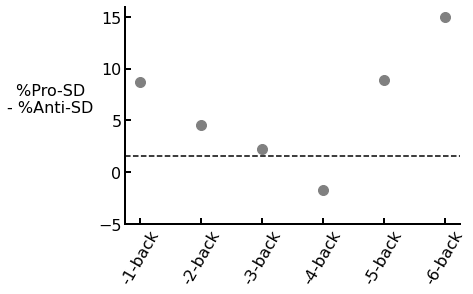

In [90]:
plt.plot(x_back, s_back, linestyle='None', marker='o', markersize=10, color='gray')
plt.axhline(np.mean(s_forward), linestyle='--', color='k')
plt.xticks(rotation=60)
plt.ylabel('%Pro-SD                 \n- %Anti-SD                 ', rotation=0)
sns.despine()
plt.ylim([-5, 16])

plt.show()

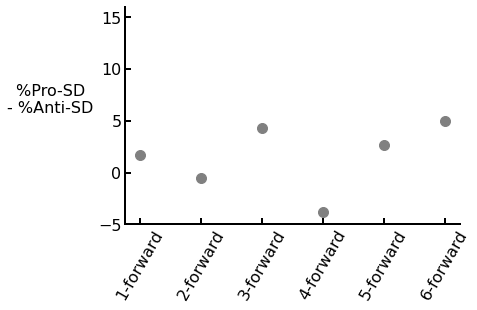

In [89]:
plt.plot(x_forward, s_forward, linestyle='None', marker='o', markersize=10, color='gray')
plt.xticks(rotation=60)
plt.ylabel('%Pro-SD                 \n- %Anti-SD                 ', rotation=0)
sns.despine()
plt.ylim([-5, 16])
plt.show()

# efficiency

In [590]:
def amplitude_calc(data, title):
    ## Von Mise fitting: Shape Similarity##
    init_vals = [-25, 4]
    best_vals, covar = curve_fit(vonmise_derivative, data['Stim_diff'], data['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
    #### RUNNING MEAN ####
    RM, xvals = getRunningMean(data['Stim_diff'], data['responseError'], step = 20)

    plt.figure(figsize=(5, 4))
    plt.plot(data['Stim_diff'], data['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
    x = np.linspace(-75, 75, 300)
    y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
    DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in data['Stim_diff']]
    plt.plot(x, y, '-', linewidth = 4, color='k')
    plt.plot(xvals, RM, label = 'Running Mean', color = 'red', linewidth = 3)
    peak_x = (x[np.argmax(y)])
    poly1d_fn, coef = getRegressionLine(x = data['Stim_diff'], y= data['responseError'], peak = peak_x)
    xdata = np.linspace(-peak_x, peak_x, 100)
    plt.plot(xdata, poly1d_fn(xdata), linestyle='--', color='powderblue', linewidth = 4)
    plt.xlim([-73, 73])
    plt.ylim([-60, 60])
    plt.yticks(np.arange(-60, 70, 10))
    # plt.xticks(np.arange(-70, 80, 20))
    plt.xticks([-73, -50, -25, 0, 25, 50, 73])
    sns.despine()
    # print(coef[0], coef[1])
    plt.title('Current and previous\n ' + title)
    plt.ylabel('Response Error\n(morph units)')
    plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
    plt.legend()
    plt.savefig('RunningMean_DOGfit_Radiologists' + title + '.eps', bbox_inches='tight', dpi=1200)
    plt.savefig('RunningMean_DOGfit_Radiologists' + title + '.jpg', bbox_inches='tight', dpi=1200)
    plt.show()
    
    if x[np.argmax(y)] > 0: 
        amplitude = np.max(y)
    else: 
        amplitude = -np.max(y)
    return x, y

        
def vm(x, mean, kai, amplitude):
    x = (x/53)*np.pi
    return amplitude * (np.exp(kai * np.cos(x-mean)) / (i0(kai) * 2 * np.pi))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


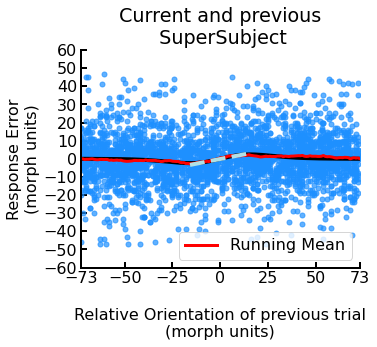

In [637]:
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)].reset_index(drop=True)
x_dog, y_dog = amplitude_calc(subjectdata, subject)

In [653]:
np.max(y_dog)

2.410365260614903

In [654]:
out = []
for idx in range(len(x_dog)):
    out.append(y_dog[idx]/x_dog[idx])
    


In [655]:
x_axis_tmp = np.linspace(-75, 75, 300)
crd = 3.97
x_axis = []
for idx in range(len(x_axis_tmp)):
    x_axis.append(x_axis_tmp[idx]/crd)


In [640]:
len(x_axis)

300

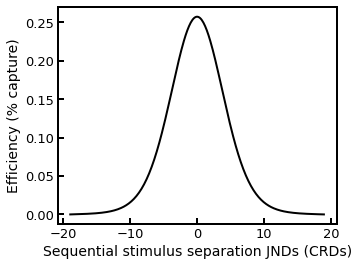

In [656]:
plt.figure(figsize=(5, 4))
plt.plot(x_axis, out, linewidth=2, color='black')
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);


In [643]:
out[150]

0.2573603845950775

In [429]:
np.save('efficiency_radiologists_x', x_axis)
np.save('efficiency_radiologists_y', out)


## Bootstrap 

In [752]:
def DoG(x, amplitude, sigma2):
    return - amplitude * x / (sigma2 ** 1.5 * np.sqrt(2 * np.pi)) * exp(- x ** 2 / (2 * sigma2))

def efficiency_xy(x_dog, y_dog):
    efficiency_y = []

    for idx in range(len(x_dog)): 
        efficiency_y.append(y_dog[idx]/x_dog[idx])



#     efficiency_x_tmp = np.linspace(-75, 75, 300)
    crd = 3.97
    efficiency_x = []
    for idx in range(len(x_dog)):
        efficiency_x.append(x_dog[idx]/crd)
        
    return efficiency_x, efficiency_y
        
def CurvefitFunc(x, y, func=DoG, init_vals=[-20, 10], bounds_input = ([-np.inf,10],[0,74])):
    best_vals, covar = curve_fit(func, x, y, p0=init_vals, bounds = bounds_input)
    return best_vals

def getRunningMean(stimuli_diff, filtered_responseError, halfway =74, step = 8):
    RM = [None] * (2 * halfway + 1); # running mean initialization
    xvals = list(range(-halfway, halfway + 1)) # index for running mean -90~90 + -90~90 (avoid error in sep[jj] == 91\92...
    allx_vals = xvals + xvals
    for ii in range(0,len(xvals) - 1): # start running mean calculation 0~180
        if ii - step // 2 >= 0:
            sep = allx_vals[(ii - step // 2) : (ii + step // 2 + 1)] # symmetric to avoid shift
        else:
            sep = allx_vals[(ii - step // 2) : len(allx_vals)] + allx_vals[0 : (ii + step // 2 + 1)]
        sep_sum = []
        for jj in range(0,len(sep)): # match every value in sep to every stimuli_diff point
            for kk in range(0, len(stimuli_diff)):
                if stimuli_diff[kk] == sep[jj]:
                    sep_sum.insert(0, filtered_responseError[kk])
        RM[ii] = np.mean(sep_sum)
    RM[2 * halfway] = RM[0]
    return RM, xvals

In [ ]:
best_vals, covar = curve_fit(vonmise_derivative, data['Stim_diff'], data['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
x = np.linspace(-75, 75, 300)
y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]


In [795]:
efficiency_x_iterations = pd.DataFrame()
efficiency_y_iterations = pd.DataFrame()

# bounds_input = ([-60,2],[60,4])
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)].reset_index(drop=True)


init_vals=[-20, 10]
init_vals2 = [-25, 4]
init_vals3=[-25, 1.5]
bounds_input = ([-np.inf,10],[0,74])
bounds_input2 = ([-60,2],[60,4])
bounds_input3 = ([-60,1],[60,1.5])
OutA = [] # Output a array, store each trial's a
x = subjectdata['Stim_diff']
y = subjectdata['responseError']
bsSize = int(1.0 * len(x))

for i in range(1000):
    RandIndex = np.random.choice(len(x), bsSize, replace=True) # get randi index of xdata
    xdataNEW = [x[i] for i in RandIndex] # change xdata index
    ydataNEW = [y[i] for i in RandIndex] # change ydata index
    try:
        best_vals, covar = curve_fit(vonmise_derivative, xdataNEW, ydataNEW, p0=init_vals3, bounds = bounds_input3)
#         best_vals, covar = curve_fit(vonmise_derivative, xdataNEW, ydataNEW, p0=init_vals, bounds = bounds_input)
#         temp_best_vals = CurvefitFunc(xdataNEW, ydataNEW, init_vals=init_vals, bounds_input=bounds_input)
        new_x = np.linspace(-75, 75, 300)
        new_y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in new_x]

#         new_y = [DoG(xi,temp_best_vals[0],temp_best_vals[1]) for xi in xdataNEW]
        efficiency_x, efficiency_y = efficiency_xy(new_x, new_y)
        
        efficiency_x_iterations[str(i)] = efficiency_x
        efficiency_y_iterations[str(i)] = efficiency_y
        OutA.append(np.max(new_y))

    except RuntimeError:
        pass
print("bs_a:",round(np.mean(OutA),2),"	95% CI:",np.percentile(OutA,[2.5,97.5]))



bs_a: 2.21 	95% CI: [1.4977354  2.99944967]


In [764]:
# new_x
min(xdataNEW), max(xdataNEW)

(-73.0, 72.0)

In [796]:
# for i in range(len(efficiency_y_iterations)):
#     efficiency_y_iterations.loc[i, 'UPPER'] = sorted(efficiency_y_iterations.iloc[i, :])[int(0.975*1000)]
#     efficiency_y_iterations.loc[i, 'LOWER'] = sorted(efficiency_y_iterations.iloc[i, :])[int(0.025*1000)]
#     efficiency_y_iterations.loc[i, 'MEAN'] = np.mean(efficiency_y_iterations.iloc[i, :])
    
    

In [801]:
efficiency_y_iterations_copy = efficiency_y_iterations.copy()
for i in range(len(efficiency_y_iterations)):
    efficiency_y_iterations.loc[i, 'UPPER'] = sorted(efficiency_y_iterations_copy.iloc[i, :])[int(0.975*1000)]
    efficiency_y_iterations.loc[i, 'LOWER'] = sorted(efficiency_y_iterations_copy.iloc[i, :])[int(0.025*1000)]
    efficiency_y_iterations.loc[i, 'MEDIAN'] = np.median(efficiency_y_iterations_copy.iloc[i, :])
    efficiency_y_iterations.loc[i, 'MEAN'] = np.mean(efficiency_y_iterations_copy.iloc[i, :])
    
    

In [804]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


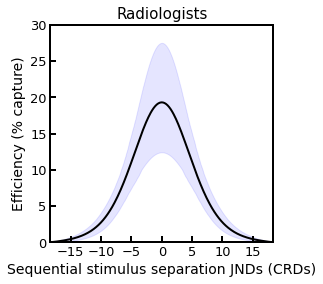

In [805]:
plt.figure(figsize=(4, 4))
plt.plot(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['MEAN']*100 , linewidth=2, color='black')
plt.fill_between(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['LOWER']*100, efficiency_y_iterations['UPPER']*100, color='b', alpha=.1)
crd_radiologists = 3.97
minx = -73/crd_radiologists
maxx= 73/crd_radiologists
plt.xlim([minx, maxx])
plt.xticks([-15, -10, -5, 0, 5, 10, 15])
plt.ylim([0, 30])
plt.yticks(np.arange(0, 32, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.title('Radiologists', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_radiologists.eps',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_radiologists.svg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_radiologists.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_radiologists.pdf',bbox_inches='tight', dpi=1000)